[[Variables]]
    amp_1:   10.0079195 +/- 0.020903 (0.21%) (init= 0.5)
    cen_1:   0.04969101 +/- 0.000729 (1.47%) (init= 1)
    sig_1:   0.25855767 +/- 0.000323 (0.13%) (init= 0.3)
    amp_2:   10.1476454 +/- 0.020929 (0.21%) (init= 0.5)
    cen_2:   0.82488017 +/- 0.000719 (0.09%) (init= 1)
    sig_2:   0.25855767 +/- 0.000323 (0.13%)  == 'sig_1'
    amp_3:   10.1061893 +/- 0.020921 (0.21%) (init= 0.5)
    cen_3:   0.88373521 +/- 0.000722 (0.08%) (init= 1)
    sig_3:   0.25855767 +/- 0.000323 (0.13%)  == 'sig_1'
    amp_4:   10.0466829 +/- 0.020910 (0.21%) (init= 0.5)
    cen_4:  -0.19326953 +/- 0.000726 (0.38%) (init= 1)
    sig_4:   0.25855767 +/- 0.000323 (0.13%)  == 'sig_1'
    amp_5:   10.1434521 +/- 0.020928 (0.21%) (init= 0.5)
    cen_5:   0.95948522 +/- 0.000719 (0.07%) (init= 1)
    sig_5:   0.25855767 +/- 0.000323 (0.13%)  == 'sig_1'
[[Correlations]] (unreported correlations are <  0.100)
    C(sig_1, amp_2)              = -0.303 
    C(sig_1, amp_5)              = -0.303 

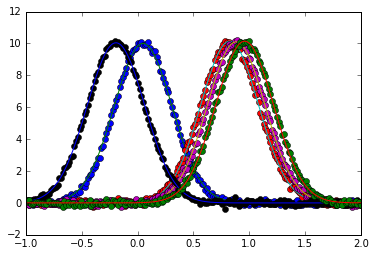

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit

def gauss(x, amp, cen, sigma):
    "basic gaussian"
    return amp*np.exp(-(x-cen)**2/(2.*sigma**2))

def gauss_dataset(params, i, x):
    """calc gaussian from params for data set i
    using simple, hardwired naming convention"""
    amp = params['amp_%i' % (i+1)].value
    cen = params['cen_%i' % (i+1)].value
    sig = params['sig_%i' % (i+1)].value
    return gauss(x, amp, cen, sig)

def objective(params, x, data):
    """ calculate total residual for fits to several data sets held
    in a 2-D array, and modeled by Gaussian functions"""
    ndata, nx = data.shape
    resid = 0.0*data[:]
    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - gauss_dataset(params, i, x)
    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

# create 5 datasets
x  = np.linspace( -1, 2, 201)
data = []
for i in np.arange(5):
    params = Parameters()
    amp   =  0.60 + 9.50#*np.random.rand()
    cen   = -0.20 + 1.20*np.random.rand()
    sig   =  0.25 + 0.03*np.random.rand()
    dat   = gauss(x, amp, cen, sig) + np.random.normal(size=len(x), scale=0.1)
    data.append(dat)

# data has shape (5, 151)
data = np.array(data)
assert(data.shape) == (5, 201)

# create 5 sets of parameters, one per data set
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add( 'amp_%i' % (iy+1), value=0.5, min=0.0,  max=200)
    fit_params.add( 'cen_%i' % (iy+1), value=1, min=-2.0,  max=2.0)
    fit_params.add( 'sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

# but now constrain all values of sigma to have the same value
# by assigning sig_2, sig_3, .. sig_5 to be equal to sig_1
for iy in (2, 3, 4, 5):
    fit_params['sig_%i' % iy].expr='sig_1'
#    fit_params['cen_%i' % iy].expr='cen_1'


# run the global fit to all the data sets
res = minimize(objective, fit_params, args=(x, data))
report_fit(res.params)

%matplotlib inline
# plot the data sets and fits
plt.figure()
for i in range(5):
    y_fit = gauss_dataset(res.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')

plt.show()

In [235]:
res.bic

-4367.1628839290252

In [236]:
res.residual

array([-0.05535232, -0.00900622, -0.12513289, ..., -0.09289065,
        0.08257953, -0.10602274])

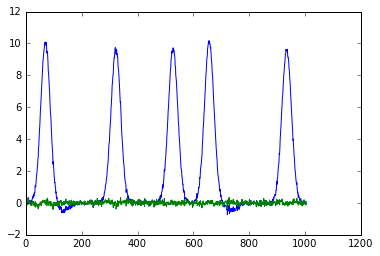

In [237]:
plt.plot(objective(fit_params, x, data))
plt.plot(res.residual)
plt.show()

In [195]:
res = minimize(objective, fit_params, args=(x, data),method='least_squares', tol=1e-6)

In [196]:
res.message

'`ftol` termination condition is satisfied.'

In [199]:
res.residual

array([-0.02900994, -0.05784707,  0.07636292, ...,  0.01626545,
       -0.13713944, -0.14879833])

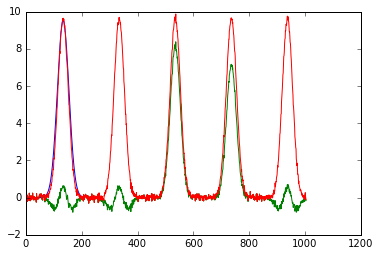

In [201]:
plt.plot(gauss(x, res.x[0],res.x[1], res.x[2]))
plt.plot(res.residual)
plt.plot(objective(fit_params, x, data))
plt.show()

In [204]:
res.var_names

['amp_1', 'cen_1', 'sig_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5']

In [205]:
res.params

Parameters([('amp_1',
             <Parameter 'amp_1', 9.523603650357412, bounds=[0.0:200]>),
            ('cen_1',
             <Parameter 'cen_1', 1.0000684976635603, bounds=[-2.0:2.0]>),
            ('sig_1',
             <Parameter 'sig_1', 0.31198688781373357, bounds=[0.01:3.0]>),
            ('amp_2',
             <Parameter 'amp_2', 9.5569601298421798, bounds=[0.0:200]>),
            ('cen_2',
             <Parameter 'cen_2', 1.0000684976635603, bounds=[-2.0:2.0], expr='cen_1'>),
            ('sig_2',
             <Parameter 'sig_2', 0.31198688781373357, bounds=[0.01:3.0], expr='sig_1'>),
            ('amp_3',
             <Parameter 'amp_3', 1.9999999904251735, bounds=[0.0:200]>),
            ('cen_3',
             <Parameter 'cen_3', 1.0000684976635603, bounds=[-2.0:2.0], expr='cen_1'>),
            ('sig_3',
             <Parameter 'sig_3', 0.31198688781373357, bounds=[0.01:3.0], expr='sig_1'>),
            ('amp_4',
             <Parameter 'amp_4', 2.9999999442241485, bounds

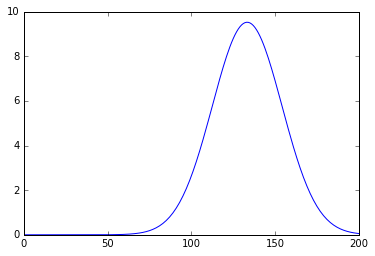

In [209]:
plt.plot(gauss_dataset(res.params, i, x))
plt.show()

In [208]:
y_fit

array([  1.13385795e-08,   1.54140141e-08,   2.09059036e-08,
         2.82890412e-08,   3.81912263e-08,   5.14404868e-08,
         6.91261913e-08,   9.26779201e-08,   1.23966980e-07,
         1.65436698e-07,   2.20269201e-07,   2.92598296e-07,
         3.87780441e-07,   5.12738702e-07,   6.76398116e-07,
         8.90235218e-07,   1.16896967e-06,   1.53143232e-06,
         2.00165149e-06,   2.61020858e-06,   3.39592470e-06,
         4.40795327e-06,   5.70836854e-06,   7.37535820e-06,
         9.50714948e-06,   1.22268228e-05,   1.56881960e-05,
         2.00829953e-05,   2.56495681e-05,   3.26834369e-05,
         4.15500425e-05,   5.27000853e-05,   6.66879327e-05,
         8.41936393e-05,   1.06049201e-04,   1.33269759e-04,
         1.67090560e-04,   2.09010599e-04,   2.60843966e-04,
         3.24780071e-04,   4.03454014e-04,   5.00028548e-04,
         6.18289187e-04,   7.62754177e-04,   9.38801184e-04,
         1.15281271e-03,   1.41234232e-03,   1.72630401e-03,
         2.10518700e-03,